In [1]:
import numpy as mp
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR')

'pt_BR'

In [2]:
#change gfw_data_cleaning para gfw_real // marco antonio f e dona ilva errados
df = pd.read_csv('C:/Users/mathe/mestrado/gfw_real_final2.csv')
#ref = pd.read_csv('C:/Users/mathe/mestrado/lista_arcgis.csv')

#pegar 2018, pegar as embarcações do rgp e colocar petrecho real
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year == 2018]
df2 = df.query('mmsi in @ref.mmsi').copy()
df3 = df2.merge(ref[['mmsi','petrecho', 'Comprimento', 'AB']], on='mmsi')

#criando colunas de month e week
df3['week'] = df3['date'].dt.week
df3['month'] = df3['date'].dt.month

In [18]:
#df3.to_csv('C:/Users/mathe/mestrado/gfw_real_arc.csv')

In [6]:
set(df.mmsi)

{710000134,
 710000799,
 710001955,
 710004421,
 710008290,
 710131976,
 710232550,
 710240366,
 710289219,
 710500000,
 710792275,
 999792275}

## talvez aqui a gente possa fazer as análise de atividade por barco, tipo horas totais pescadas, quanto tempo o AIS ficou ligado etc.

In [3]:
#Indexação por data, será importante para agregar valores por mês para o próximo gráfico.
df3['date'] = pd.to_datetime(df3['date'])
df3.set_index('date', inplace = True)

NameError: name 'df3' is not defined

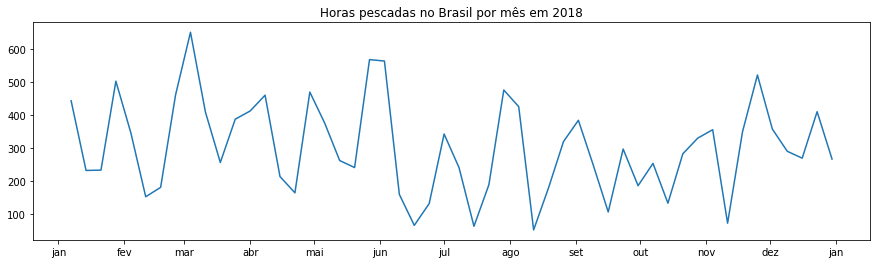

In [7]:
#Plotando variação temporal da pesca geral
fig, axes1 = plt.subplots(figsize=(15,4))
df4 = df3.groupby(pd.Grouper(freq="w")).agg('sum')
plt.title('Horas pescadas no Brasil por mês em 2018')
months = mdates.MonthLocator()
axes1.xaxis.set_major_locator(months)

monthyearFmt = mdates.DateFormatter('%b')
axes1.xaxis.set_major_formatter(monthyearFmt)


plt.plot(df4['fishing_hours']);


<BarContainer object of 12 artists>

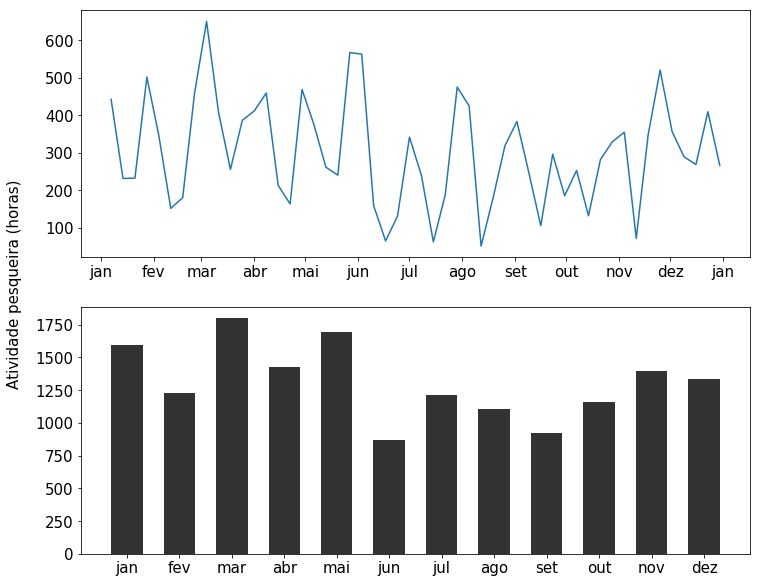

In [8]:
#data sets para os subplots
df_m = df3.groupby(pd.Grouper(freq="m")).agg('sum')
df_w = df3.groupby(pd.Grouper(freq="w")).agg('sum')

#criando o subplot - podia ter feito só 'axes' e descompactado em ax1, ax2 depois. assim, para itens comuns
#era só usar axes e para particulares só o ax em sim, sem ter que colocar coordenadas
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

#formatação do mês para ax1
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)

#meses para o ax2 (que não sai do daterime para não ficar com o alinhamento zuado)
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']


#ylabel compartilhado (na verdade é um pedaço de texto, não uma label em si)
fig.text(0.04, 0.5, 'Atividade pesqueira (horas)', va='center', rotation='vertical', size=15)

#tamanho das labels
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

#plotando
ax1.plot(df_w['fishing_hours']);
ax2.bar(height=df_m['fishing_hours'], width=0.6, x=meses, color='.2')


In [9]:
df3.fishing_hours.sum()/24

655.3897800925926

<BarContainer object of 12 artists>

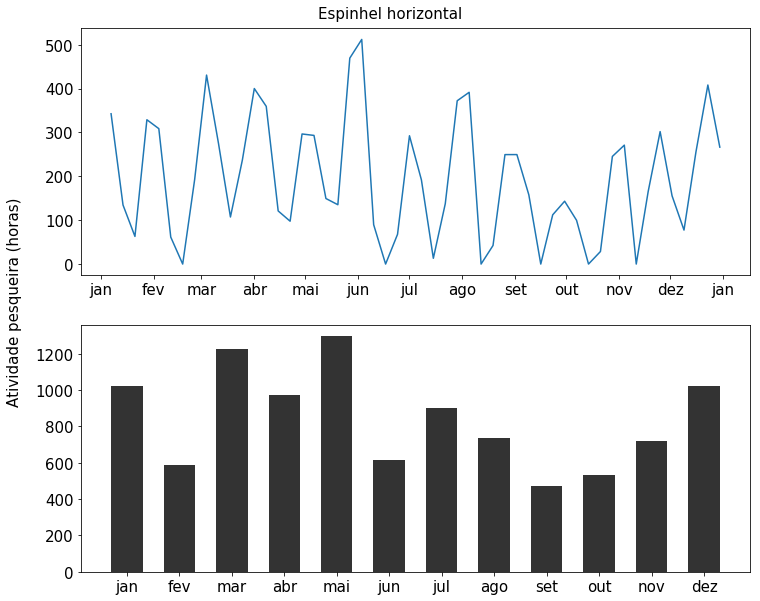

In [10]:
#data sets para os subplots
dfm_dl = df3.query('petrecho == "drifting_longlines"').groupby(pd.Grouper(freq="m")).agg('sum').copy()
dfw_dl = df3.query('petrecho == "drifting_longlines"').groupby(pd.Grouper(freq="w")).agg('sum').copy()

#criando o subplot - podia ter feito só 'axes' e descompactado em ax1, ax2 depois. assim, para itens comuns
#era só usar axes e para particulares só o ax em sim, sem ter que colocar coordenadas
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

#formatação do mês para ax1
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)

#meses para o ax2 (que não sai do daterime para não ficar com o alinhamento zuado)
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']


#ylabel compartilhado (na verdade é um pedaço de texto, não uma label em si)
fig.text(0.04, 0.5, 'Atividade pesqueira (horas)', va='center', rotation='vertical', size=15)
fig.text(0.4, 0.9, 'Espinhel horizontal', va='center', size=15)

#tamanho das labels
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

#plotando
ax1.plot(dfw_dl['fishing_hours']);
ax2.bar(height=dfm_dl['fishing_hours'], width=0.6, x=meses, color='.2')


In [11]:
#data sets para os subplots
dl = df3.query('petrecho == "drifting_longlines"').copy()
dl.mmsi.unique()

array([710240366, 710000134, 710001955, 710000799, 999792275, 710792275],
      dtype=int64)

,lat_bin,lon_bin,mmsi,fishing_hours,flag,vessel_class,registry_vessel_class,inferred_vessel_class,inferred_vessel_class_score,inferred_vessel_class_ag,...,active_2016,active_2017,active_2018,lat_bin2,lon_bin2,petrecho,Comprimento,AB,week,month
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-33.8,-50.9,710240366,5.041667,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.8,-50.8,drifting_longlines,26.37,110.0,1,1
2018-01-01,-33.8,-50.8,710240366,9.049444,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.7,-50.9,drifting_longlines,26.37,110.0,1,1
2018-01-01,-33.7,-50.9,710240366,8.312083,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.7,-50.8,drifting_longlines,26.37,110.0,1,1
2018-01-01,-33.7,-50.8,710240366,3.433889,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.9,-50.9,drifting_longlines,26.37,110.0,1,1
2018-01-02,-33.9,-50.9,710240366,9.880833,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.9,-51.1,drifting_longlines,26.37,110.0,1,1
2018-01-02,-33.9,-51.1,710240366,3.666944,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.9,-51.0,drifting_longlines,26.37,110.0,1,1
2018-01-02,-33.9,-51.0,710240366,6.955139,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-33.8,-51.0,drifting_longlines,26.37,110.0,1,1
2018-01-02,-33.8,-51.0,710240366,3.272361,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-34.0,-50.9,drifting_longlines,26.37,110.0,1,1
2018-01-03,-34.0,-50.9,710240366,4.900139,BRA,drifting_longlines,NaN,drifting_longlines,0.607394,drifting_longlines,...,True,True,True,-34.0,-51.0,drifting_longlines,26.37,110.0,1,1


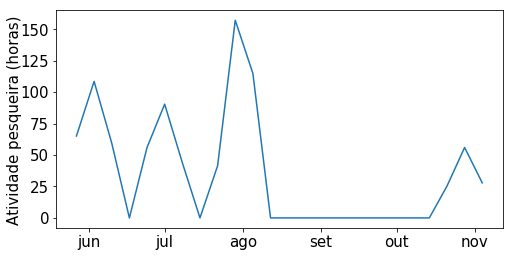

In [32]:
#data sets para os subplots
dl = df3.query('petrecho == "drifting_longlines"').copy()
dl_vessel = dl.query('mmsi == 710792275 or mmsi ==999792275').groupby(pd.Grouper(freq="w")).agg('sum').copy()

#criando figura
fig, (ax1) = plt.subplots(figsize=(8,4))

#formatação do mês para ax1
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)


#ylabel compartilhado (na verdade é um pedaço de texto, não uma label em si)
fig.text(0.04, 0.5, 'Atividade pesqueira (horas)', va='center', rotation='vertical', size=15)
#fig.text(0.4, 0.9, 'Espinhel horizontal', va='center', size=15)

#tamanho das labels
ax1.tick_params(labelsize=15)

#plotando
ax1.plot(dl_vessel['fishing_hours']);


In [15]:
dfm_ps

,lat_bin,lon_bin,mmsi,fishing_hours,inferred_vessel_class_score,inferred_vessel_class_ag_score,self_reported_fishing,length_m,tonnage_gt,engine_power_kw,...,active_2015,active_2016,active_2017,active_2018,lat_bin2,lon_bin2,Comprimento,AB,week,month
date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-516.4,-977.4,14916073599,72.859722,14.973674,14.973674,21.0,626.233350,3708.213336,7944.954983,...,21.0,21.0,21.0,21.0,-516.0,-977.0,714.0,5460.0,59,21
2018-02-28,-1831.7,-3125.6,45450562081,305.867639,46.044350,46.044350,64.0,1733.271775,9938.826679,20239.889536,...,24.0,64.0,64.0,64.0,-1830.7,-3124.8,2143.5,16185.0,495,128
2018-03-31,-2109.1,-3721.5,54684045933,338.156250,54.276492,54.276492,77.0,2107.055598,11912.370499,24754.943837,...,32.0,77.0,77.0,77.0,-2105.3,-3719.9,2595.5,19705.0,836,231
2018-04-30,-3112.5,-5439.3,80249927458,296.549167,78.665324,78.665324,113.0,3069.475456,17097.158075,35728.065554,...,40.0,113.0,113.0,113.0,-3105.0,-5432.8,3817.0,29030.0,1765,452
2018-05-31,-1718.1,-3047.4,44743690438,204.236806,43.640699,43.640699,63.0,1767.577022,9952.490436,21188.063838,...,35.0,63.0,63.0,63.0,-1717.9,-3047.6,2139.5,16345.0,1232,315
2018-06-30,-1766.1,-3201.2,47583874168,204.807083,45.930843,45.930843,67.0,1860.861401,10332.064404,22060.446577,...,32.0,67.0,67.0,67.0,-1757.0,-3196.6,2278.0,17420.0,1577,402
2018-07-31,-875.0,-1416.1,19882959686,74.744444,19.898346,19.898346,28.0,719.216069,3976.792594,7940.768080,...,1.0,28.0,28.0,28.0,-874.9,-1416.0,934.5,7035.0,808,196
2018-08-31,-1895.1,-3505.9,52551205575,227.337500,54.547911,54.547911,74.0,1991.219217,11647.610085,23216.193350,...,27.0,74.0,74.0,74.0,-1893.2,-3503.6,2461.0,18470.0,2481,592
2018-09-30,-1681.6,-3160.9,48290882169,251.050000,46.962812,46.962812,68.0,1819.441613,9985.265617,20836.169841,...,17.0,68.0,68.0,68.0,-1682.2,-3161.1,2297.0,17470.0,2527,612


<BarContainer object of 12 artists>

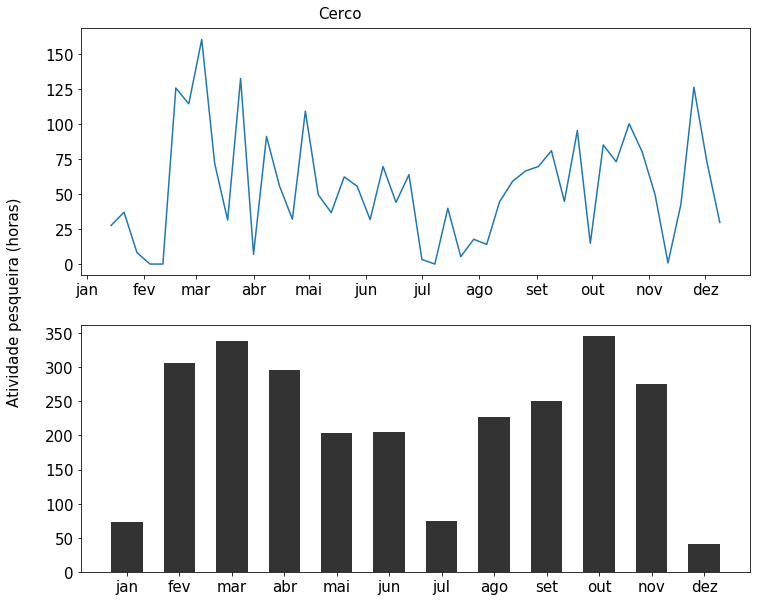

In [12]:
#data sets para os subplots
dfm_ps = df3.query('petrecho == "purse_seines"').groupby(pd.Grouper(freq="m")).agg('sum').copy()
dfw_ps = df3.query('petrecho == "purse_seines"').groupby(pd.Grouper(freq="w")).agg('sum').copy()

#criando o subplot - podia ter feito só 'axes' e descompactado em ax1, ax2 depois. assim, para itens comuns
#era só usar axes e para particulares só o ax em sim, sem ter que colocar coordenadas
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

#formatação do mês para ax1
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)

#meses para o ax2 (que não sai do daterime para não ficar com o alinhamento zuado)
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']


#ylabel compartilhado (na verdade é um pedaço de texto, não uma label em si)
fig.text(0.04, 0.5, 'Atividade pesqueira (horas)', va='center', rotation='vertical', size=15)
fig.text(0.4, 0.9, 'Cerco', va='center', size=15)

#tamanho das labels
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

#plotando
ax1.plot(dfw_ps['fishing_hours']);
ax2.bar(height=dfm_ps['fishing_hours'], width=0.6, x=meses, color='.2')


In [35]:
#data sets para os subplots
dl = df3.query('petrecho == "purse_seines"').copy()
dl.mmsi.unique()

array([710289219, 710004421, 710131976], dtype=int64)

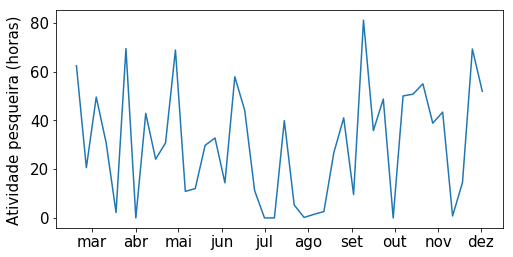

In [38]:
#data sets para os subplots
ps = df3.query('petrecho == "purse_seines"').copy()
ps_vessel = ps.query('mmsi == 710131976').groupby(pd.Grouper(freq="w")).agg('sum').copy()

#criando figura
fig, (ax1) = plt.subplots(figsize=(8,4))

#formatação do mês para ax1
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
monthyearFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthyearFmt)


#ylabel compartilhado (na verdade é um pedaço de texto, não uma label em si)
fig.text(0.04, 0.5, 'Atividade pesqueira (horas)', va='center', rotation='vertical', size=15)
#fig.text(0.4, 0.9, 'Espinhel horizontal', va='center', size=15)

#tamanho das labels
ax1.tick_params(labelsize=15)

#plotando
ax1.plot(ps_vessel['fishing_hours']);

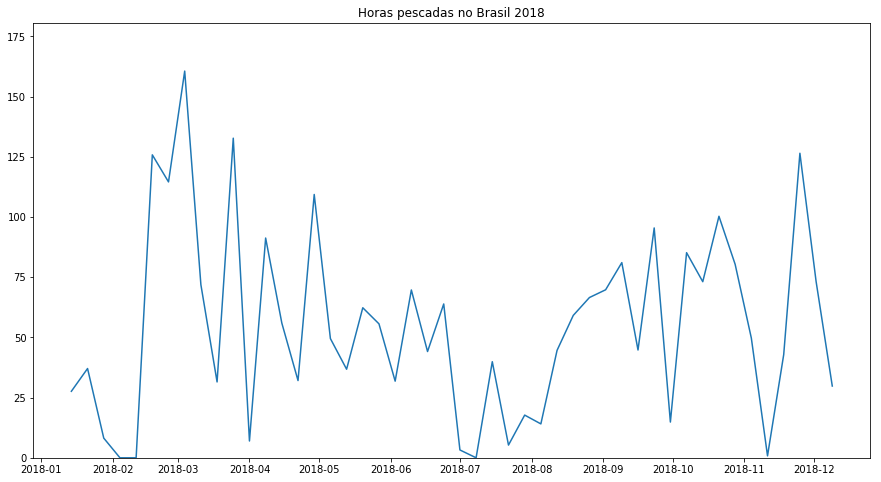

In [129]:
plt.figure(figsize=(15,8))
df5 = df3.query('petrecho == "purse_seines"').groupby(pd.Grouper(freq="w")).sum()
plt.title('Horas pescadas no Brasil 2018')
plt.ylim([0, df5['fishing_hours'].max() + 20])
plt.plot(df5['fishing_hours']);

In [134]:
df5.index

DatetimeIndex(['2018-01-14', '2018-01-21', '2018-01-28', '2018-02-04',
               '2018-02-11', '2018-02-18', '2018-02-25', '2018-03-04',
               '2018-03-11', '2018-03-18', '2018-03-25', '2018-04-01',
               '2018-04-08', '2018-04-15', '2018-04-22', '2018-04-29',
               '2018-05-06', '2018-05-13', '2018-05-20', '2018-05-27',
               '2018-06-03', '2018-06-10', '2018-06-17', '2018-06-24',
               '2018-07-01', '2018-07-08', '2018-07-15', '2018-07-22',
               '2018-07-29', '2018-08-05', '2018-08-12', '2018-08-19',
               '2018-08-26', '2018-09-02', '2018-09-09', '2018-09-16',
               '2018-09-23', '2018-09-30', '2018-10-07', '2018-10-14',
               '2018-10-21', '2018-10-28', '2018-11-04', '2018-11-11',
               '2018-11-18', '2018-11-25', '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')

In [13]:
df4.head()

,lat_bin,lon_bin,mmsi,fishing_hours,inferred_vessel_class_score,inferred_vessel_class_ag_score,self_reported_fishing,length_m,tonnage_gt,engine_power_kw,...,active_2015,active_2016,active_2017,active_2018,lat_bin2,lon_bin2,Comprimento,AB,week,month
date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-10076.7,-22302.1,453044318378,1591.109028,543.193933,546.360696,196.0,16310.507654,98185.053044,228903.759556,...,102.0,255.0,638.0,638.0,-10069.8,-22307.1,16832.00,91977.0,1914,638
2018-02-28,-3717.8,-16357.2,315994827996,1228.812222,361.953571,366.175922,149.0,11078.605490,57877.905250,152359.705495,...,88.0,205.0,445.0,445.0,-3710.1,-16358.3,11761.70,67499.0,3375,890
2018-03-31,-3264.1,-29108.7,582946718022,1797.320139,693.237980,698.515919,324.0,20963.082602,122345.584247,290869.825886,...,51.0,314.0,821.0,821.0,-3235.7,-29097.8,21867.65,124219.0,9034,2463
2018-04-30,-4911.1,-21578.0,404735202290,1427.805972,473.466928,475.050310,292.0,14848.570218,89544.300744,201354.494593,...,40.0,270.0,570.0,570.0,-4906.7,-21575.2,15838.57,94085.0,8897,2280
2018-05-31,-9371.6,-31859.9,656891845459,1692.106389,799.664263,810.716818,286.0,23733.118588,155091.101085,330125.238233,...,35.0,233.0,897.0,917.0,-9369.3,-31863.2,24513.81,140090.0,18439,4585


In [30]:
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')
print(datetime.now().strftime('%A %d de %B de %Y, %H:%M:%S'))

segunda-feira 13 de janeiro de 2020, 15:14:48
